In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
import sys

sys.path.insert(0, 'C:/Users/User/Documents/4. Fourth Year/Project/Railway-Fares/Code/3. ML')

from data_helper import *

from datetime import datetime
import pickle
import os

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
def score(model, X, y):
        y_pred = model.predict(X).reshape(-1)
        u = ((y - y_pred)** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v

In [15]:
def fit_and_save_model(model, epochs):
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience = 10)

    model.compile(
        optimizer="adam",
        loss='mean_absolute_error')

    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, callbacks = [es])
    
    val_score = np.round(score(model, X_val, y_val), 4)
    timestamp = datetime.now().strftime("%Y-%m-%d %H'%M")
    
    folder_name = f"{timestamp} - {epochs} - {val_score}"
    
    os.mkdir(folder_name)
    
    with open(f"{folder_name}\model.pickle", 'wb') as f:
        pickle.dump(model, f)
        
        
    tf.keras.utils.plot_model(model, to_file = f"{folder_name}\Architecture.png", show_shapes = True, show_layer_names = False)
           
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error")
    plt.savefig(f"{folder_name}\Train Graph.png", dpi=300)
    plt.show()

In [16]:
def test_architecture(layer_sizes, epochs = 50, activation = 'relu'):
    normalizer = layers.Normalization(input_shape=[42,], axis=None)
    normalizer.adapt(X_train)
    model = keras.Sequential([keras.layers.Dense(s, activation = activation) for s in layer_sizes] + [keras.layers.Dense(1)])
    fit_and_save_model(model, epochs = epochs)


In [17]:
X_train = dataset_in["train"]["simd"]
y_train = dataset_in["train"]["y"]

X_val = dataset_in["val"]["simd"]
y_val = dataset_in["val"]["y"]

X_test = dataset_in["test"]["simd"]
y_test = dataset_in["test"]["y"]

Epoch 1/50
1198/1198 [==============================] - 6s 5ms/step - loss: 590.6122 - val_loss: 572.7944
Epoch 2/50
1198/1198 [==============================] - 4s 3ms/step - loss: 558.7188 - val_loss: 563.4419
Epoch 3/50
1198/1198 [==============================] - 4s 3ms/step - loss: 549.5699 - val_loss: 554.7365
Epoch 4/50
1198/1198 [==============================] - 4s 3ms/step - loss: 542.1926 - val_loss: 545.7298
Epoch 5/50
1198/1198 [==============================] - 3s 3ms/step - loss: 535.5034 - val_loss: 538.3560
Epoch 6/50
1198/1198 [==============================] - 3s 2ms/step - loss: 528.4919 - val_loss: 531.7106
Epoch 7/50
1198/1198 [==============================] - 2s 2ms/step - loss: 520.5207 - val_loss: 525.8053
Epoch 8/50
1198/1198 [==============================] - 2s 2ms/step - loss: 510.3751 - val_loss: 518.7029
Epoch 9/50
1198/1198 [==============================] - 2s 2ms/step - loss: 503.3870 - val_loss: 513.0678
Epoch 10/50
1198/1198 [=======================

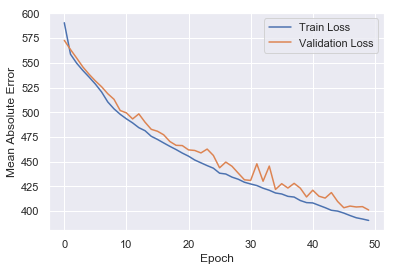

Epoch 1/50
1198/1198 [==============================] - 11s 9ms/step - loss: 570.9946 - val_loss: 560.5295
Epoch 2/50
1198/1198 [==============================] - 8s 7ms/step - loss: 541.3098 - val_loss: 562.7266
Epoch 3/50
1198/1198 [==============================] - 8s 7ms/step - loss: 518.5518 - val_loss: 517.4055
Epoch 4/50
1198/1198 [==============================] - 9s 7ms/step - loss: 501.8709 - val_loss: 498.6929
Epoch 5/50
1198/1198 [==============================] - 8s 7ms/step - loss: 487.6301 - val_loss: 491.0990
Epoch 6/50
1198/1198 [==============================] - 8s 7ms/step - loss: 476.4678 - val_loss: 475.4409
Epoch 7/50
1198/1198 [==============================] - 8s 7ms/step - loss: 466.0062 - val_loss: 466.9367
Epoch 8/50
1198/1198 [==============================] - 8s 7ms/step - loss: 456.6333 - val_loss: 459.7833
Epoch 9/50
1198/1198 [==============================] - 15s 13ms/step - loss: 448.8264 - val_loss: 449.3613
Epoch 10/50
1198/1198 [====================

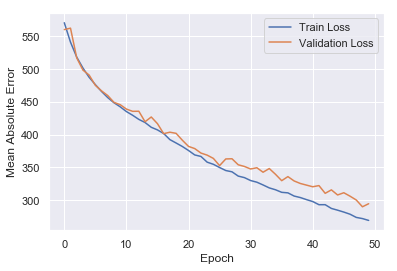

Epoch 1/50
1198/1198 [==============================] - 61s 50ms/step - loss: 556.4238 - val_loss: 531.1717
Epoch 2/50
1198/1198 [==============================] - 55s 46ms/step - loss: 513.0142 - val_loss: 498.5193
Epoch 3/50
1198/1198 [==============================] - 58s 48ms/step - loss: 495.4891 - val_loss: 494.0455
Epoch 4/50
1198/1198 [==============================] - 58s 49ms/step - loss: 480.5952 - val_loss: 490.6933
Epoch 5/50
1198/1198 [==============================] - 60s 50ms/step - loss: 465.8164 - val_loss: 458.9524
Epoch 6/50
1198/1198 [==============================] - 55s 46ms/step - loss: 454.5774 - val_loss: 451.6808
Epoch 7/50
1198/1198 [==============================] - 60s 50ms/step - loss: 444.1917 - val_loss: 440.9395
Epoch 8/50
1198/1198 [==============================] - 59s 49ms/step - loss: 433.3665 - val_loss: 433.5958
Epoch 9/50
1198/1198 [==============================] - 58s 48ms/step - loss: 420.3485 - val_loss: 442.6122
Epoch 10/50
1198/1198 [=====

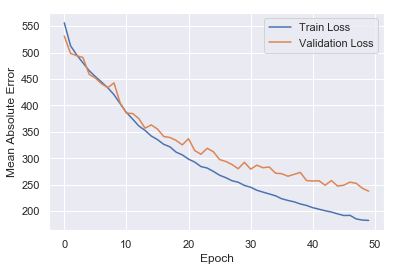

Epoch 1/50
1198/1198 [==============================] - 206s 172ms/step - loss: 565.5587 - val_loss: 549.9311
Epoch 2/50
1198/1198 [==============================] - 206s 172ms/step - loss: 533.5685 - val_loss: 520.1873
Epoch 3/50
1198/1198 [==============================] - 212s 177ms/step - loss: 512.5863 - val_loss: 508.6510
Epoch 4/50
1198/1198 [==============================] - 211s 176ms/step - loss: 501.1838 - val_loss: 506.1665
Epoch 5/50
1198/1198 [==============================] - 209s 175ms/step - loss: 487.0271 - val_loss: 514.7244
Epoch 6/50
1198/1198 [==============================] - 216s 181ms/step - loss: 477.0507 - val_loss: 478.0312
Epoch 7/50
1198/1198 [==============================] - 213s 178ms/step - loss: 468.9154 - val_loss: 489.8407
Epoch 8/50
1198/1198 [==============================] - 214s 179ms/step - loss: 460.7280 - val_loss: 463.5618
Epoch 9/50
1198/1198 [==============================] - 218s 182ms/step - loss: 454.2556 - val_loss: 456.1203
Epoch 10/5

KeyboardInterrupt: 

In [19]:
architectures = [
    [50, 100, 50],
    [500, 1000, 10],
    [100, 5000, 1000, 100],
    [5000, 5000]
]

for a in architectures:
    test_architecture(a)

In [29]:
X_train["y"] = y_train

In [30]:
X_train

,crime_rate.origin,drive_primary.origin,drive_secondary.origin,PT_post.destination,nocentralheating_rate.destination,difference_crime_rate,PT_GP.destination,drive_secondary.destination,employment_rate.destination,nocentralheating_rate.origin,...,difference_drive_post,income_rate.destination,drive_GP.destination,PT_post.origin,difference_nocentralheating_rate,difference_income_rate,PT_retail.destination,difference_drive_GP,difference_employment_rate,y
34939,0.031672,1.993843,4.561115,4.592552,0.035004,0.548328,7.073392,4.688130,0.072464,0.013542,...,0.039239,0.114432,3.349597,7.538495,0.021462,-0.074160,7.463269,1.555693,-0.008302,370
18419,0.009275,3.997709,6.845590,5.349670,0.004956,0.016254,9.118975,5.241705,0.128480,0.003550,...,-2.379372,0.271949,3.663348,14.811694,0.001406,0.209752,10.014962,-2.888920,0.084487,1020
32398,0.031828,2.942567,5.315072,5.901875,0.051863,-0.005739,4.158409,3.487377,0.113012,0.009337,...,-0.103058,0.250907,1.661365,7.154321,0.042526,-0.056005,7.505075,-1.501059,-0.025761,440
5969,0.030017,4.298219,4.749694,8.600603,0.017254,-0.009607,9.865174,3.575774,0.054034,0.018672,...,0.676347,0.087258,3.974022,8.777961,-0.001418,-0.024699,15.952198,0.613457,0.009861,1430
9213,0.023334,2.964493,6.461155,9.488898,0.007396,0.003103,9.309843,3.816627,0.078618,0.008997,...,0.624612,0.163495,2.820551,5.493517,-0.001601,0.045990,10.618107,-0.203812,0.011887,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11861,0.038070,2.304289,9.618035,5.431660,0.013188,-0.018721,6.341296,3.372335,0.048662,0.007618,...,-0.492387,0.084077,1.996867,6.712300,0.005570,-0.101695,10.534174,-1.371235,-0.043914,1840
20849,0.010172,3.736164,11.696034,7.955064,0.007025,0.019837,7.418469,5.833284,0.159369,0.008305,...,0.371936,0.340434,2.961151,7.449337,-0.001280,0.182780,9.073351,0.612853,0.088158,940
13812,0.026438,2.856941,3.816627,7.819872,0.003670,-0.004324,9.039079,5.769538,0.058223,0.007396,...,0.088930,0.117467,2.826262,9.488898,-0.003726,-0.046028,13.058452,0.005711,-0.020395,1250
22952,0.025142,2.126322,4.033623,6.738074,0.007133,-0.014366,10.715173,3.194581,0.053954,0.019003,...,-1.443405,0.099039,3.342013,10.625311,-0.011870,-0.292291,10.852187,0.262510,-0.124252,660
